In [26]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


# Imports

This section encompasses the inclusion of various libraries and modules, serving the purposes of data manipulation, preprocessing, modeling, and evaluation. These encompass renowned libraries such as NumPy, pandas, Counter, scikit-learn, matplotlib, category encoders, among others.

**Exploratory Data Analysis:** The presence of the Counter import suggests its potential utilization for exploratory data analysis (EDA). It can be instrumental in tallying the occurrences of elements within the dataset.

**Data Preprocessing:** The importation of StandardScaler signals its potential application for feature scaling during the preprocessing phase of the data.

**Data Splitting and Modeling:** The imports originating from the sklearn.model_selection module indicate the intention to partition the dataset into training and testing sets. Additionally, it suggests the application of grid search and feature selection techniques during the modeling process.

**Decision Tree Modeling:** The incorporation of the DecisionTreeClassifier import suggests the intention to employ decision tree classification methodologies. Furthermore, various metrics have been imported to facilitate the comprehensive evaluation of the model's performance.

**Data Visualization:** The choice of matplotlib implies its utilization for data visualization purposes. This tool can be instrumental in creating graphical representations, such as charts and graphs, to gain deeper insights into the dataset.

Categorical Encoding: The inclusion of the category_encoders module implies its possible use for encoding categorical variables found within the dataset.

**Model Evaluation:** The imports of tree, confusion_matrix, and classification_report from the scikit-learn library denote their conventional application in the evaluation of decision tree models. This encompasses the generation of confusion matrices and classification reports to assess model performance comprehensively.

In [58]:
# Loading dataset
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import pandas for data manipulation and analysis

# Import Counter from collections for exploratory data analysis.
from collections import Counter

# Import StandardScaler from scikit-learn for data preprocessing.
from sklearn.preprocessing import StandardScaler

# Import train_test_split, GridSearchCV, SelectFromModel for data splitting and modeling.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

# Import DecisionTreeClassifier and various metrics for data modeling and evaluation.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve
from sklearn import metrics

# Import matplotlib for data visualization.
from matplotlib import pyplot as plt

# import category encoders for encoding categorical variables.
import category_encoders as ce

# Import tree, confusion_matrix, and classification_report for decision tree modeling and evaluation.
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### Data Loading

In this section , the essential data is loaded to serve as the foundation for subsequent tasks. The data is sourced from four CSV files, and the pandas library is utilized to manage the data loading process.






In [7]:
x_train = pd.read_csv('/content/x_train.csv')
y_train = pd.read_csv('/content/y_train.csv')

In [8]:
x_test = pd.read_csv('/content/x_test.csv')
y_test = pd.read_csv('/content/y_test.csv')


### Sample Data Preview (Head of x_train)

To gain a preliminary understanding of the dataset, we have examined the first few rows of the `x_train` DataFrame. This sample provides a snapshot of the data, including key features that may be relevant for analysis or modeling. Below are the first five rows:

This table provides an overview of the first five rows of the dataset, showing values for various meteorological parameters at 9 am. These parameters include air pressure, air temperature, average wind direction, average wind speed, maximum wind direction, maximum wind speed, rain accumulation, and rain duration.

This initial exploration of the data allows us to observe the range and nature of the variables, which will be crucial for subsequent analysis and modeling tasks.



In [9]:
x_train.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
0,918.300000,64.004000,71.700000,6.621342,82.500000,8.030615,0.00,0.0
1,920.740000,59.090000,180.000000,8.992499,194.000000,10.759681,0.08,520.0
2,917.290000,78.206000,51.500000,7.180577,68.000000,9.193823,0.00,0.0
3,915.104853,80.661032,214.407657,1.535364,116.843001,2.411888,0.00,0.0
4,916.500000,71.042000,102.300000,2.415895,49.100000,3.221194,0.00,0.0


In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        744 non-null    float64
 1   air_temp_9am            744 non-null    float64
 2   avg_wind_direction_9am  744 non-null    float64
 3   avg_wind_speed_9am      744 non-null    float64
 4   max_wind_direction_9am  744 non-null    float64
 5   max_wind_speed_9am      744 non-null    float64
 6   rain_accumulation_9am   744 non-null    float64
 7   rain_duration_9am       744 non-null    float64
dtypes: float64(8)
memory usage: 46.6 KB


In [11]:
x_train.isnull().any()

air_pressure_9am          False
air_temp_9am              False
avg_wind_direction_9am    False
avg_wind_speed_9am        False
max_wind_direction_9am    False
max_wind_speed_9am        False
rain_accumulation_9am     False
rain_duration_9am         False
dtype: bool

In [12]:
x_train.value_counts()

air_pressure_9am  air_temp_9am  avg_wind_direction_9am  avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  rain_accumulation_9am  rain_duration_9am
907.990000        41.360000     161.200000              12.258431           187.700000              17.761304           0.98                   3079.0               1
920.423863        70.860058     198.973954              4.388916            211.300844              5.259443            0.00                   0.0                  1
920.304857        59.275479     38.580082               5.782928            59.235807               7.288503            0.00                   0.0                  1
920.310000        83.138000     53.200000               14.159830           74.500000               17.738934           0.00                   0.0                  1
920.330000        68.864000     122.400000              2.035615            182.000000              3.086977            0.00                   0.0                  1
         

In [14]:
x_train.shape

(744, 8)

In [15]:
x_train.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,918.898530,65.263721,141.881078,5.509977,147.297550,7.015225,0.201929,291.248650
std,3.144481,11.219542,68.832653,4.449596,67.283385,5.465674,1.608293,1634.415342
min,907.990000,36.752000,15.500000,0.782929,31.800000,1.185578,0.000000,0.000000
25%,916.697500,57.398000,65.282862,2.281679,75.966032,3.154085,0.000000,0.000000
50%,918.921045,66.012233,166.206460,3.892276,173.900000,4.988376,0.000000,0.000000
75%,921.134993,73.945164,190.900000,7.337163,201.349459,8.936575,0.000000,0.000000
max,929.320000,91.112000,343.400000,21.541732,299.200000,26.659596,24.020000,17704.000000


In [16]:
y_train.head()

,high_humidity_label
0,0
1,1
2,1
3,0
4,1


In [17]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   high_humidity_label  744 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


In [18]:
y_train.value_counts()

high_humidity_label
0                      376
1                      368
dtype: int64

In [19]:
y_train.isnull().any()

high_humidity_label    False
dtype: bool

In [20]:
y_train.shape

(744, 1)

In [21]:
y_train.describe()

,high_humidity_label
count,744.000000
mean,0.494624
std,0.500307
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.33, random_state = 42)

In [23]:
X_train.shape, X_test.shape

((498, 8), (246, 8))

# Decision Tree Classifier with criterion gini index

In [31]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# Predict the Test set results with criterion gini index

In [32]:
y_pred_gini = clf_gini.predict(X_test)

# Check accuracy score with criterion gini index

In [35]:
print ("Model accuracy score with criterion gini index: {0:0.4f}".format(accuracy_score(Y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7724


# Compare the train-set and test-set accuracy

In [36]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7590


# Check for overfitting and underfitting

In [38]:

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 0.7590
Test set score: 0.7724


# Visualize decision-trees

[Text(0.5, 0.875, 'x[0] <= 919.218\ngini = 0.499\nsamples = 498\nvalue = [259, 239]'),
 Text(0.25, 0.625, 'x[1] <= 68.837\ngini = 0.43\nsamples = 256\nvalue = [80, 176]'),
 Text(0.125, 0.375, 'x[2] <= 90.083\ngini = 0.232\nsamples = 127\nvalue = [17, 110]'),
 Text(0.0625, 0.125, 'gini = 0.499\nsamples = 21\nvalue = [10, 11]'),
 Text(0.1875, 0.125, 'gini = 0.123\nsamples = 106\nvalue = [7, 99]'),
 Text(0.375, 0.375, 'x[7] <= 139.0\ngini = 0.5\nsamples = 129\nvalue = [63, 66]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 123\nvalue = [63, 60]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.75, 0.625, 'x[1] <= 55.571\ngini = 0.385\nsamples = 242\nvalue = [179, 63]'),
 Text(0.625, 0.375, 'x[2] <= 57.45\ngini = 0.463\nsamples = 44\nvalue = [16, 28]'),
 Text(0.5625, 0.125, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0.6875, 0.125, 'gini = 0.245\nsamples = 28\nvalue = [4, 24]'),
 Text(0.875, 0.375, 'x[5] <= 9.35\ngini = 0.291\nsamples = 198\nvalue = [163

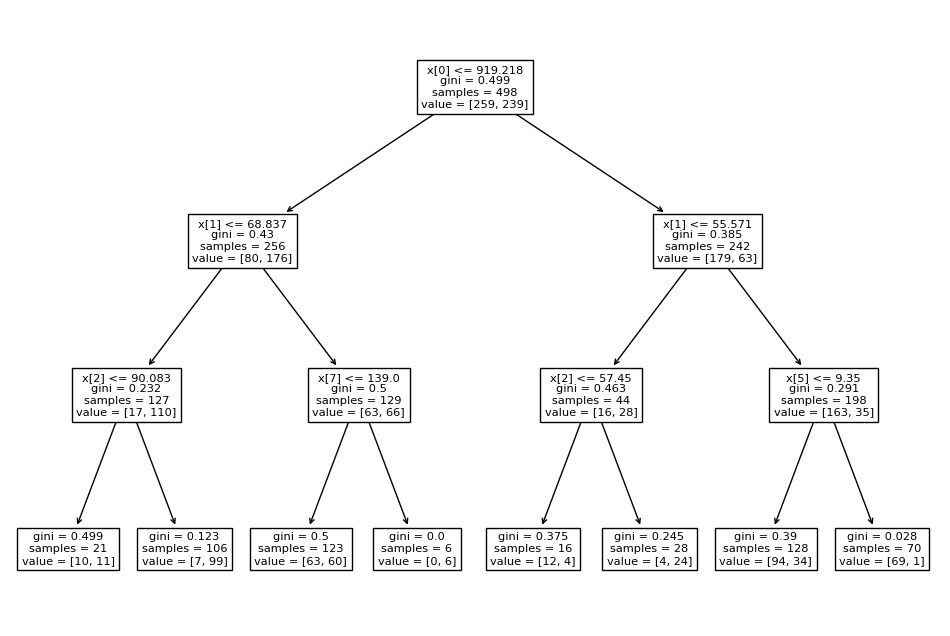

In [40]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, Y_train))

# Decision Tree Classifier with criterion entropy

In [49]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [50]:
y_pred_en = clf_en.predict(X_test)

In [51]:

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7886


In [52]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [53]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_en)))

Training-set accuracy score: 0.7550


In [54]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))

Training set score: 0.7550
Test set score: 0.7886


[Text(0.5, 0.875, 'x[0] <= 919.218\nentropy = 0.999\nsamples = 498\nvalue = [259, 239]'),
 Text(0.25, 0.625, 'x[1] <= 61.542\nentropy = 0.896\nsamples = 256\nvalue = [80, 176]'),
 Text(0.125, 0.375, 'x[0] <= 917.175\nentropy = 0.391\nsamples = 91\nvalue = [7, 84]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 63\nvalue = [0, 63]'),
 Text(0.1875, 0.125, 'entropy = 0.811\nsamples = 28\nvalue = [7, 21]'),
 Text(0.375, 0.375, 'x[5] <= 14.182\nentropy = 0.99\nsamples = 165\nvalue = [73, 92]'),
 Text(0.3125, 0.125, 'entropy = 0.982\nsamples = 159\nvalue = [67, 92]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.625, 'x[1] <= 55.571\nentropy = 0.827\nsamples = 242\nvalue = [179, 63]'),
 Text(0.625, 0.375, 'x[3] <= 3.894\nentropy = 0.946\nsamples = 44\nvalue = [16, 28]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.6875, 0.125, 'entropy = 0.992\nsamples = 29\nvalue = [16, 13]'),
 Text(0.875, 0.375, 'x[5] <= 10.77\nentrop

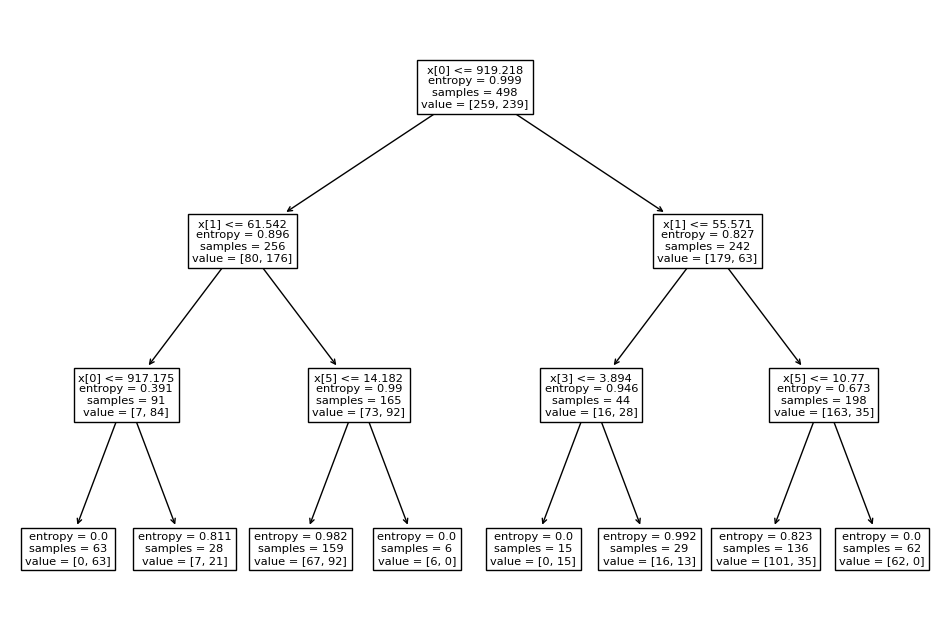

In [55]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, Y_train))

# Confusion matrix

A confusion matrix serves as a valuable tool for summarizing the performance of a classification algorithm. It provides a comprehensive overview of the classification model's effectiveness and the kinds of errors it generates. It offers a concise breakdown of accurate and erroneous predictions for each category, and this summary is presented in tabular format.

When evaluating the performance of a classification model, there are four possible outcomes:

1. True Positives (TP): These occur when we predict that an observation belongs to a specific class, and the observation indeed belongs to that class.

2. True Negatives (TN): True Negatives happen when we predict that an observation does not belong to a particular class, and the observation indeed does not belong to that class.

3. False Positives (FP): False Positives arise when we predict that an observation belongs to a certain class, but it actually does not. This type of error is referred to as Type I error.

4. False Negatives (FN): False Negatives occur when we predict that an observation does not belong to a certain class, but it actually does. This is a significant error known as Type II error.

These four outcomes are summarized within a confusion matrix, as depicted below.

In [57]:
cm = confusion_matrix(Y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 83  34]
 [ 18 111]]


In [65]:
print(classification_report(Y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       117
           1       0.77      0.86      0.81       129

    accuracy                           0.79       246
   macro avg       0.79      0.78      0.79       246
weighted avg       0.79      0.79      0.79       246



# QUESTION 2



### Step 1: Data Collection

Collect a comprehensive dataset that includes patient-specific information and tumor characteristics, including attributes such as age, family history, tumor size, shape, margin, and texture. Ground truth labels indicate whether each tumor is benign or malignant.

### Step 2: Data Preprocessing

- Handle Missing Values: Address missing data points appropriately, either by imputing values or removing rows.
- Outlier Detection: Identify and handle outliers to prevent skewed predictions.
- Feature Engineering: Create relevant features that can enhance diagnostic accuracy.
- Encoding: Convert categorical variables into a suitable format for analysis.
- Feature Scaling: Normalize or standardize numeric features.

### Step 3: Building the Decision Tree

The Decision Tree algorithm begins by selecting the most informative attributes for distinguishing between benign and malignant tumors.

### Step 4: Attribute Selection

In breast cancer diagnosis, attribute selection plays a vital role. Two commonly used attribute selection measures are tailored to this application:

- **Tumor Features**: Attributes like tumor size, shape irregularity, and texture are crucial.
- **Age and Family History**: Patient-specific attributes can also influence cancer risk.

### Step 5: Splitting and Node Creation

The dataset is divided into subsets based on the selected attributes. New nodes are created in the Decision Tree, representing decision points.

### Step 6: Recursion

The algorithm continues to recursively evaluate attributes and split the dataset to make increasingly refined decisions.

### Step 7: Pruning (Optional)

To prevent overfitting, pruning may be performed, removing nodes that do not significantly improve model performance on validation data.

### Step 8: Diagnosis

The Decision Tree is employed for breast cancer diagnosis. Starting at the root node, the tree is traversed based on patient attributes, ultimately reaching a leaf node that provides the diagnosis.

### Step 9: Evaluation

Metrics specific to breast cancer diagnosis, including accuracy, precision, recall, F1-score, and the ROC curve, assess model performance.

Now, let's explore how the splitting process and calculations using entropy are integrated into the Decision Tree algorithm for breast cancer diagnosis:

#### Attribute Selection and Splitting

The algorithm selects attributes for splitting based on their ability to minimize uncertainty (entropy) in the dataset. Entropy quantifies the randomness or impurity in a set of data points.

- **Entropy**: Entropy, represented as H(S), is calculated for the entire dataset S before splitting. It is computed using the formula:

  ![Entropy Formula](https://latex.codecogs.com/svg.image?H(S)&space;=&space;-\sum_{i=1}^{c}P(c_i)&space;\log_{2}(P(c_i)))

  Where:
  - H(S) is the entropy of the dataset.
  - c is the number of classes (benign and malignant).
  - P(c_i) is the probability of class c_i in the dataset.

The entropy value ranges from 0 (pure dataset, all one class) to 1 (maximum impurity, equal distribution of classes).

#### Information Gain

- **Information Gain**: Information Gain (IG) measures the reduction in entropy achieved by splitting the dataset based on a specific attribute. It is calculated as follows:

  ![Information Gain Formula](https://latex.codecogs.com/svg.image?IG(S,&space;A)&space;=&space;H(S)&space;-&space;\sum_{v&space;\in&space;Values(A)}\left(\frac{|S_v|}{|S|}\right)&space;H(S_v))

  Where:
  - IG(S, A) is the information gain by splitting the dataset S using attribute A.
  - Values(A) represents the distinct values of attribute A.
  - |S_v| is the number of instances in subset S for which attribute A has the value v.
  - |S| is the total number of instances in the dataset S.
  - H(S_v) is the entropy of the subset S_v.

The attribute with the highest Information Gain is chosen for splitting, as it maximizes the reduction in entropy.

#### Splitting Decision

The Decision Tree algorithm repeats the process for each attribute and selects the one that maximizes Information Gain or minimizes entropy, effectively making the decision on how to split the dataset at each node.

the Decision Tree algorithm for breast cancer diagnosis uses entropy and Information Gain calculations to identify attributes that provide the most valuable information for distinguishing between benign and malignant tumors. These calculations guide the algorithm in making informed decisions during the splitting process, ultimately leading to accurate diagnostic predictions.








Certainly, here is a step-by-step explanation of how the Decision Tree algorithm can be applied to the task of breast cancer diagnosis:

### Step 1: Data Collection

The first step in utilizing Decision Trees for breast cancer diagnosis is to gather relevant data. In this context, we need a dataset that includes information about breast tumors, such as their size, shape, texture, and other attributes. This dataset should also include labels indicating whether each tumor is benign (non-cancerous) or malignant (cancerous). The more comprehensive and accurate the dataset, the better the model's diagnostic capabilities.

### Step 2: Data Preprocessing

Before constructing the Decision Tree, it's essential to preprocess the data. This involves tasks like handling missing values, removing outliers, and ensuring that the data is in a suitable format for analysis. Additionally, feature scaling and encoding categorical variables may be necessary, depending on the dataset.

### Step 3: Building the Decision Tree

Now, we proceed to construct the Decision Tree. The algorithm begins with the entire dataset, treating it as the root node of the tree. The goal is to determine which attributes (features) are most informative for distinguishing between benign and malignant tumors.

### Step 4: Attribute Selection

The Decision Tree algorithm selects attributes at each level of the tree to split the dataset into subsets. The choice of the attribute at each step is crucial for the accuracy of the diagnosis. Two common attribute selection measures are Information Gain and Gini Index.

- Information Gain: This measure quantifies the reduction in uncertainty (entropy) achieved by splitting the dataset based on a particular attribute. Attributes that result in the most significant reduction in entropy are preferred.

- Gini Index: The Gini Index measures the impurity of a dataset. A lower Gini Index indicates a purer subset. The attribute that leads to the lowest Gini Index is selected.

### Step 5: Splitting and Node Creation

Based on the selected attribute, the dataset is divided into subsets, and new nodes are created in the Decision Tree. These nodes represent decision points where the algorithm evaluates the chosen attribute's value for each data point.

### Step 6: Recursion

The process of attribute selection, splitting, and node creation continues recursively for each subset of data until one of the stopping criteria is met. Stopping criteria can include a maximum depth for the tree or a minimum number of samples per leaf node.

### Step 7: Pruning (Optional)

After constructing the entire Decision Tree, we may need to perform pruning to prevent overfitting. Overfitting occurs when the tree is too complex and fits the training data perfectly but does not generalize well to new, unseen data. Pruning involves removing nodes that do not significantly improve the model's performance on validation data.

### Step 8: Diagnosis

Once the Decision Tree is fully constructed, we can use it for breast cancer diagnosis. To make a diagnosis for a new patient, we start at the root node and follow the path through the tree based on the patient's tumor attributes. As we traverse the tree, we eventually reach a leaf node, which provides the diagnosis—either benign or malignant.

### Step 9: Evaluation

To assess the model's performance, we use metrics such as accuracy, precision, recall, and F1-score. These metrics help us understand how well the Decision Tree can correctly classify breast tumors and whether it meets the required level of accuracy for practical clinical use.

### Step 10: Continuous Improvement

Breast cancer diagnosis is an ongoing process, and Decision Trees can be updated and refined as new data becomes available. Regularly updating the model with fresh data helps ensure its accuracy and effectiveness in diagnosing breast cancer.

In summary, the Decision Tree algorithm provides a systematic and interpretable approach to breast cancer diagnosis, enabling healthcare professionals to make informed decisions based on tumor attributes. By following these steps, we can develop a valuable tool for early detection and improved treatment outcomes in breast cancer patients.